# Supervised Learning: Boosting - XGBoost (Project)

<a id="import-libraries"></a>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <ul><a href='#1'>1. Import libraries</a></ul>
        <ul><a href='#2'>2. Load the Dataset</a></ul>
        <ul><a href='#3'>3. Exploratory Data Analysis (EDA) and Feature Engineering</a></ul>
        <ul><a href='#4'>4. XGBoost Model</a></ul>
        <ul><a href='#6'>4.1. Hyperparameter Tunning: GridSearch and Cross Validation</a></ul>
        <ul><a href='#9'>4.2. XGBoost Model: Results and Evaluation</a></ul>
        <ul><a href='#10'>5. Model Comparative Analysis</a></ul>
<br>
</div>
<hr>

<a id ="1"></a>
## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            accuracy_score, precision_score, recall_score, f1_score

from xgboost import XGBClassifier
from xgboost import plot_importance

<a id ="2"></a>
## 2. Load the Dataset

In [2]:
with open('data/invistico_airline.pickle', 'rb') as to_read:
    data = pd.read_pickle(to_read)
    
data.head(n = 2)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0


<a id ="3"></a>
## 3. Exploratory Data Analysis (EDA) and Feature Engineering

In [3]:
# Descriptive statistics
data.describe().style.format(precision=2).background_gradient(cmap ='Set3')

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129487.00
mean,39.43,1981.41,2.84,2.99,2.85,2.99,3.25,3.38,3.52,3.47,3.47,3.49,3.70,3.34,3.71,3.35,14.71,15.09
std,15.12,1027.12,1.39,1.53,1.44,1.31,1.32,1.35,1.31,1.31,1.27,1.29,1.16,1.26,1.15,1.30,38.07,38.47
min,7.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,1359.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,40.00,1925.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,0.00,0.00
75%,51.00,2544.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,5.00,4.00,5.00,5.00,4.00,5.00,4.00,12.00,13.00
max,85.00,6951.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [4]:
# Dysplay the data types
data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [5]:
# Check the number of rows and columns in the original dataset
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the original dataset')

There are 129880 rows and 22 columns in the original dataset


In [6]:
# Data Encodong
data_mod = pd.get_dummies(data, columns=['satisfaction','Customer Type','Type of Travel','Class'])
data_mod = data_mod.drop(['satisfaction_dissatisfied'], axis = 1)

data_mod.head(n = 2)

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_satisfied,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,0,0.0,True,True,False,False,True,False,True,False
1,47,2464,0,0,0,3,0,2,2,3,...,310,305.0,True,True,False,False,True,True,False,False


In [7]:
# Check the number of rows and columns in a modified dataset
print(f'There are {data_mod.shape[0]} rows and {data_mod.shape[1]} columns in a modified dataset')

There are 129880 rows and 26 columns in a modified dataset


<a id ="4"></a>
# 4. XGBoost Model

In [8]:
# Define the target variable
target = 'satisfaction_satisfied'
y = data_mod[target]

# Define the predictor variables
feature_cols = [x for x in data_mod.columns if x != target]

X = data_mod[feature_cols]

# Training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
# Instantiate the model
xgb = XGBClassifier(objective = 'binary:logistic', random_state = 0)

<a id ="5"></a>
## 4.1. Hyperparameter Tunning: GridSearch and Cross Validation

In [10]:
# Hyperparamters
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

scoring = ['accuracy', 'precision', 'recall', 'f1']

In [12]:
# GridSearch Cross-Validation
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

In [13]:
# Fit the model on training data

xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [14]:
# Save the trained model

pickle.dump(xgb_cv, open('data/xgb_cv.sav', 'wb'))

<a id ="6"></a>
## 4.2. XGBoost: Results and Evaluation

In [15]:
# Prediction on test data

prediction = xgb_cv.predict(X_test)

In [16]:
# Evaluation metrics

result_table_xgb = pd.DataFrame({'Model': ['XGBoost'],
                                'Accuracy': [accuracy_score(y_test, prediction)],
                                'Precision': [precision_score(y_test, prediction)],
                                'Recall': [recall_score(y_test, prediction)],
                                 'F1': [f1_score(y_test, prediction)]
                                })
result_table_xgb

,Model,Accuracy,Precision,Recall,F1
0,XGBoost,0.934555,0.946974,0.932978,0.939924


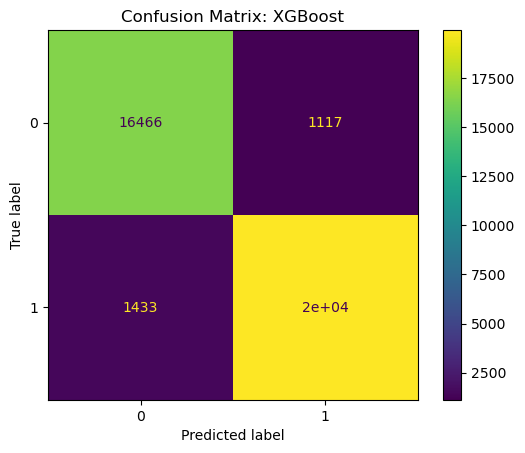

In [17]:
# Confusion Matrix Plot

def conf_matrix_plot(y_test, prediction):
    
    cm = confusion_matrix(y_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_cv.classes_)
    disp.plot()
    disp.ax_.set_title('Confusion Matrix: XGBoost', fontsize = 12)
    plt.show()
    plt.close()

conf_matrix_plot(y_test, prediction)

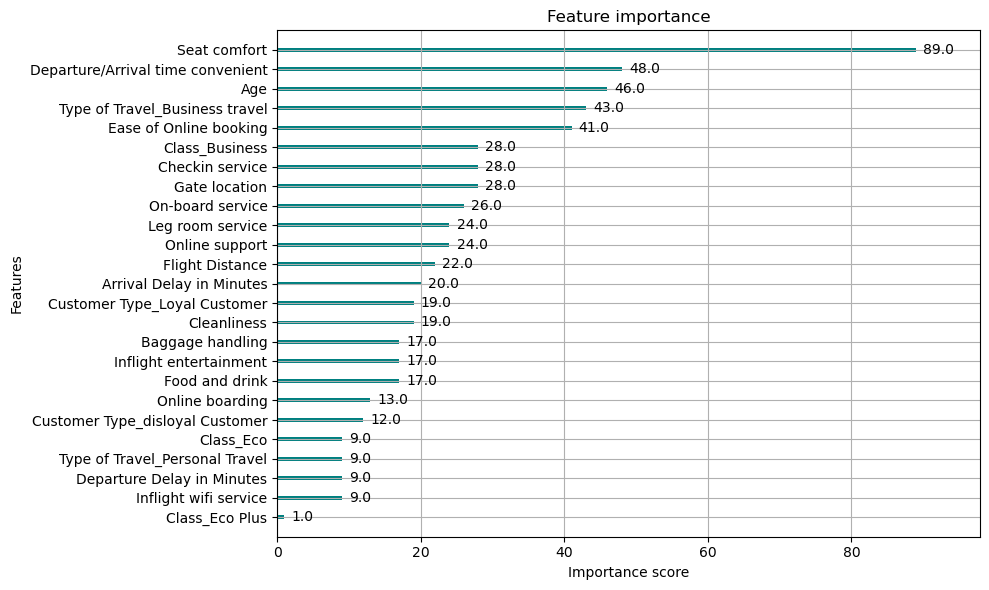

In [18]:
# Feature importance graph

fig, ax = plt.subplots(figsize = (10, 6))

plot_importance(xgb_cv.best_estimator_, ax = ax)

for bar in ax.containers[0]:
    bar.set_facecolor('teal')
    
plt.tight_layout()
plt.show()

In [19]:
# Model Comparative Analysis

prev_results = pd.read_csv('data/results.csv')

upd_results = pd.concat([prev_results, result_table_xgb], ignore_index = True)
upd_results.round(4).sort_values(by=['F1'], ascending=False, ignore_index = True)

,Model,Accuracy,Precision,Recall,F1
0,Tuned Random Forest,0.9429,0.9525,0.9428,0.9476
1,Tuned Decision Tree,0.9381,0.9542,0.9316,0.9427
2,XGBoost,0.9346,0.9470,0.9330,0.9399
3,Decision Tree,0.9337,0.9385,0.9407,0.9396


___
Author: Olga Khon, PhD in Finance